# ADVANCED REGRESSION ASSIGNMENT

# Buisness Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at ahigher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. Your mentor will share career advice and can help expand your professional network. 44Australia. The company is looking at prospective properties to buy to enter the market.

#### What we need to do?
- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

#### The steps are broadly:
1. Read and understanding the data
2. Dealing with missing values and data modification
3. Perform Exploratory Data Analysis
4. Data Preparation
5. Model Building and Evaluation


## 1. Read and Understanding the data

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed 
import time

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# formating the options for the output cells 

pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format= '{:0.4f}'.format

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")

# checking the head of df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# checking the shape

print(' Shape of Dataframe: {}'.format(df.shape))
print('- No of Rows: {} & No of columns: {}'.format(df.shape[0], df.shape[1]))

 Shape of Dataframe: (1460, 81)
- No of Rows: 1460 & No of columns: 81


In [5]:
# describing the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0000,1460.0000,1201.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1452.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1379.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,730.5000,56.8973,70.0500,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.6853,443.6397,46.5493,567.2404,1057.4295,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,6.5178,0.6130,1978.5062,1.7671,472.9801,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.4890,6.3219,2007.8158,180921.1959
std,421.6100,42.3006,24.2848,9981.2649,1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,161.3193,441.8670,438.7053,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,1.6254,0.6447,24.6897,0.7473,213.8048,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.1230,2.7036,1.3281,79442.5029
min,1.0000,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1900.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000,34900.0000
25%,365.7500,20.0000,59.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1961.0000,1.0000,334.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,2007.0000,129975.0000
50%,730.5000,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,991.5000,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000,163000.0000
75%,1095.2500,70.0000,80.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,166.0000,712.2500,0.0000,808.0000,1298.2500,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2002.0000,2.0000,576.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000,214000.0000
max,1460.0000,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,2010.0000,4.0000,1418.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.0000,12.0000,2010.0000,755000.0000


## 2. Dealing with missing values and data modification

### 2.1 Handling missing values

In [6]:
# checking for missing value percentage

df_null= pd.DataFrame()
df_null['Columns']= df.columns
df_null['Null %']= [round(df[col].isnull().sum()/len(df)*100,2) for col in df.columns]
df_null['Datatype'] = [df.dtypes[col] for col in df.columns]
df_null.sort_values(by= 'Null %', inplace= True, ascending= False)

df_null= df_null[df_null['Null %'] > 0]
df_null

,Columns,Null %,Datatype
72,PoolQC,99.5200,object
74,MiscFeature,96.3000,object
6,Alley,93.7700,object
73,Fence,80.7500,object
57,FireplaceQu,47.2600,object
3,LotFrontage,17.7400,float64
59,GarageYrBlt,5.5500,float64
64,GarageCond,5.5500,object
58,GarageType,5.5500,object
60,GarageFinish,5.5500,object


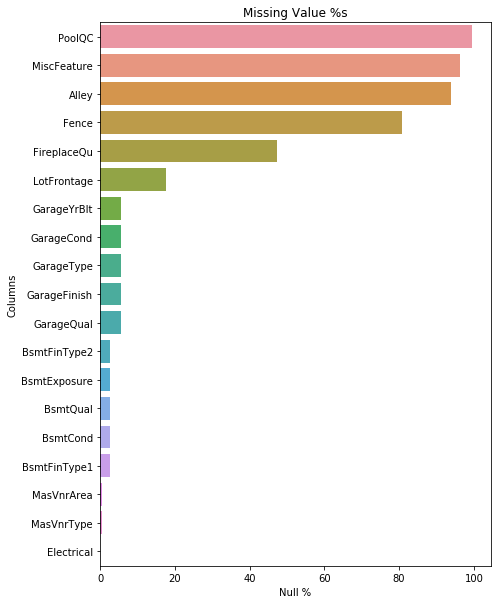

In [7]:
# plotting Missing Value %'s 

plt.figure(figsize= (7,10))

sns.barplot(data= df_null, x= 'Null %', y= 'Columns')
plt.title('Missing Value %s')
plt.show()

In [8]:
# extracting columns having missing % >= 20 

missing_col = df_null[df_null['Null %'] >= 20]['Columns'].to_list()
missing_col


['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [9]:
# dropping columns having missing values >= 20 

df.drop(columns= missing_col, axis= 1, inplace= True)

In [10]:
# checking for missing value percentage

df_null= pd.DataFrame()
df_null['Columns']= df.columns
df_null['Null %']= [round(df[col].isnull().sum()/len(df)*100,2) for col in df.columns]
df_null['Datatype'] = [df.dtypes[col] for col in df.columns]
df_null.sort_values(by= 'Null %', inplace= True, ascending= False)

df_null= df_null[df_null['Null %'] > 0]
df_null

,Columns,Null %,Datatype
3,LotFrontage,17.7400,float64
56,GarageType,5.5500,object
62,GarageCond,5.5500,object
57,GarageYrBlt,5.5500,float64
58,GarageFinish,5.5500,object
61,GarageQual,5.5500,object
34,BsmtFinType2,2.6000,object
31,BsmtExposure,2.6000,object
32,BsmtFinType1,2.5300,object
30,BsmtCond,2.5300,object


In [11]:
# describing the missing columns 

df[df_null['Columns']].describe(include= 'all')

,LotFrontage,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
count,1201.0000,1379,1379,1379.0000,1379,1379,1422,1422,1423,1423,1423,1452.0000,1452,1459
unique,nan,6,5,nan,3,5,6,4,6,4,4,nan,4,5
top,nan,Attchd,TA,nan,Unf,TA,Unf,No,Unf,TA,TA,nan,None,SBrkr
freq,nan,870,1326,nan,605,1311,1256,953,430,1311,649,nan,864,1334
mean,70.0500,NaN,NaN,1978.5062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.6853,NaN,NaN
std,24.2848,NaN,NaN,24.6897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0662,NaN,NaN
min,21.0000,NaN,NaN,1900.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
25%,59.0000,NaN,NaN,1961.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
50%,69.0000,NaN,NaN,1980.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
75%,80.0000,NaN,NaN,2002.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.0000,NaN,NaN


In [12]:
# imputing LotFrontage with the median 

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace= True) 

In [13]:
# imputing MasVnrArea with the median 

df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace= True) 

In [14]:
# imputing the null MasVnrType with mode

df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace= True)

In [15]:
# imputing Electrical with the mode 

df['Electrical'].fillna(df['Electrical'].mode()[0], inplace= True) 

In [16]:
# imputing some of categorical variables null values with 'NA'

df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']]=  df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']].fillna('NA')

In [17]:
# dropping GarageYrBlt

df.drop(columns= 'GarageYrBlt', inplace= True)

In [18]:
# checking the final missing value percentage

df_null= pd.DataFrame()
df_null['Columns']= df.columns
df_null['Null %']= [round(df[col].isnull().sum()/len(df)*100,2) for col in df.columns]

df_null.sort_values(by= 'Null %', inplace= True, ascending= False)
df_null

,Columns,Null %
0,Id,0.0000
56,GarageType,0.0000
54,Functional,0.0000
53,TotRmsAbvGrd,0.0000
52,KitchenQual,0.0000
...,...,...
24,MasVnrType,0.0000
23,Exterior2nd,0.0000
22,Exterior1st,0.0000
21,RoofMatl,0.0000


 `Inferences`:

 1. All the meaning full nulls for the category columns are replaced with 'None'.
 2. Some of the categorical column nulls are replaced with Mode of the respective columns.
 3. Numerical columns are replaced with medians.



### 2.2  Data modification

In [19]:
# dropping ID column 

df.drop(columns= ['Id'], inplace= True)

In [20]:
# dropping columns related to years which are not required 

df.drop(columns= ['YearRemodAdd', 'MoSold', 'YrSold'], inplace= True)

In [21]:
# converting YearBuilt into age by subtracting year from 2021

df.insert(loc= 1, column= 'age', value= 2021 - df['YearBuilt'])

In [22]:
# dropping YearBuilt

df.drop(columns= ['YearBuilt'], inplace= True)

In [23]:
# converting the columns ['MSSubClass', 'OverallQual', 'OverallCond'] to object as these defines the scoring

df[['MSSubClass', 'OverallQual', 'OverallCond']]= df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [24]:
# checking the final shape of dataframe after data manipulation

df.shape

(1460, 71)

### 2.3 Dealing with Skewness in Categorical columns 

In [25]:
# pulling categorical columns 

df_cat= df.select_dtypes(include= 'object')
df_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


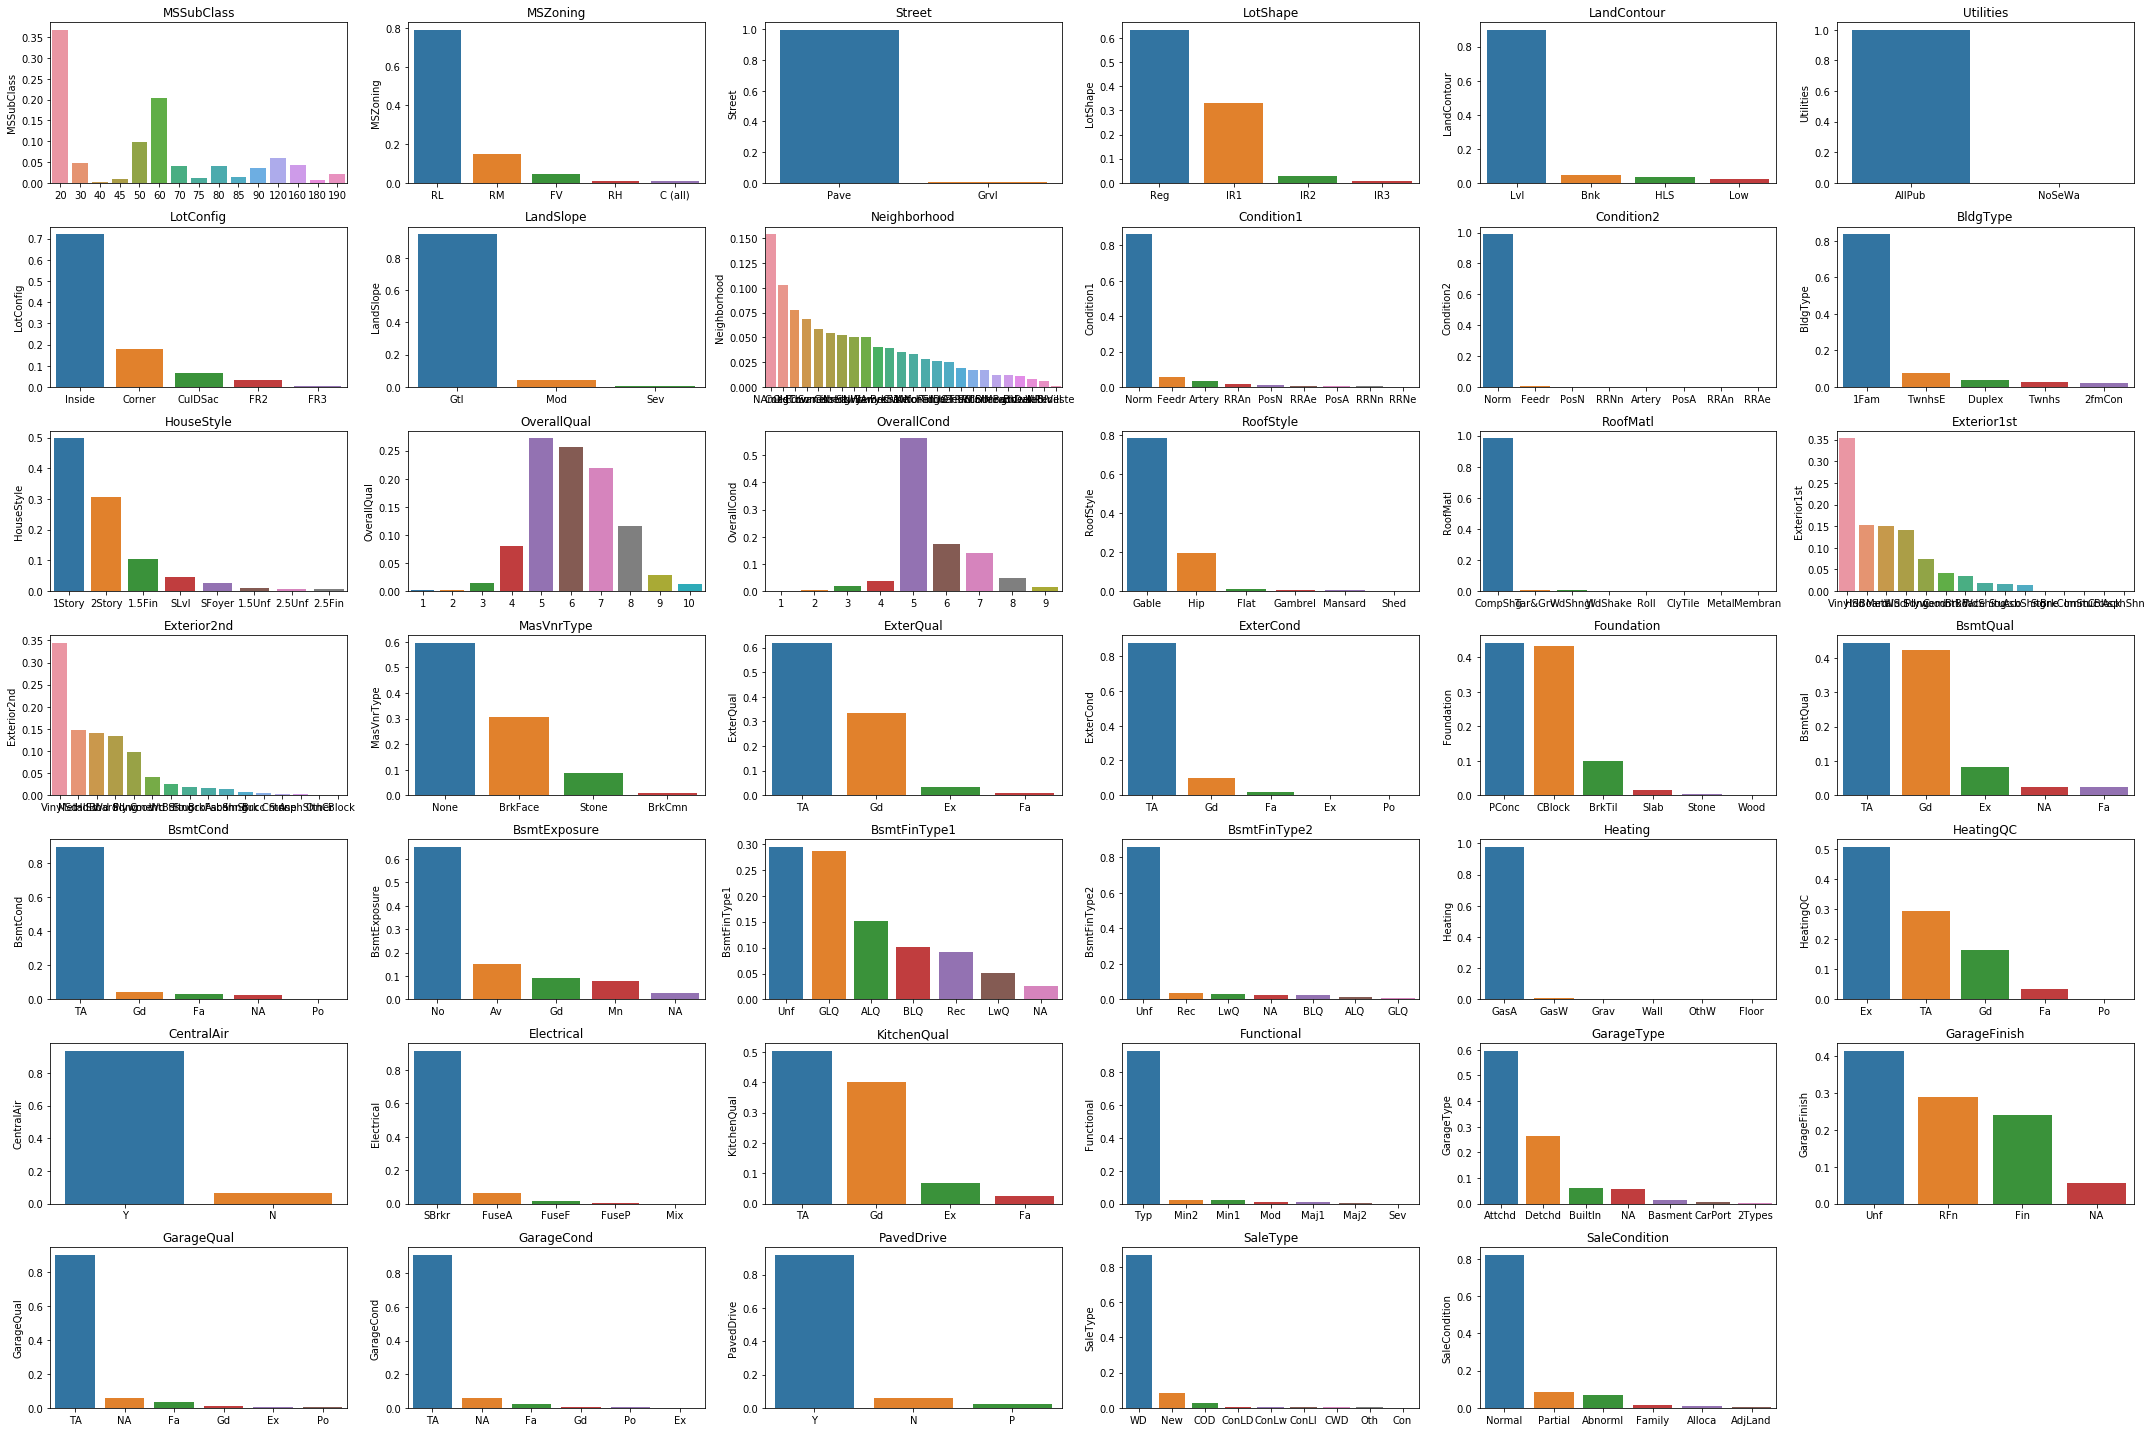

In [26]:
# plotting all categories in boxplots 

plt.figure(figsize= [30, 20])

for i in enumerate(df_cat): 
    plt.subplot(7,6, i[0]+1)
    sns.barplot(x= df_cat[i[1]].value_counts().index, y= df_cat[i[1]].value_counts(normalize= True))
    plt.tight_layout()
    plt.title(i[1])

In [27]:
# dropping highly skewed columns 

df.drop(columns= ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'RoofStyle','ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], inplace= True)

In [28]:
# removing the cols in df_cat dataframe

df_cat.drop(columns= ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'RoofStyle','ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], inplace= True)

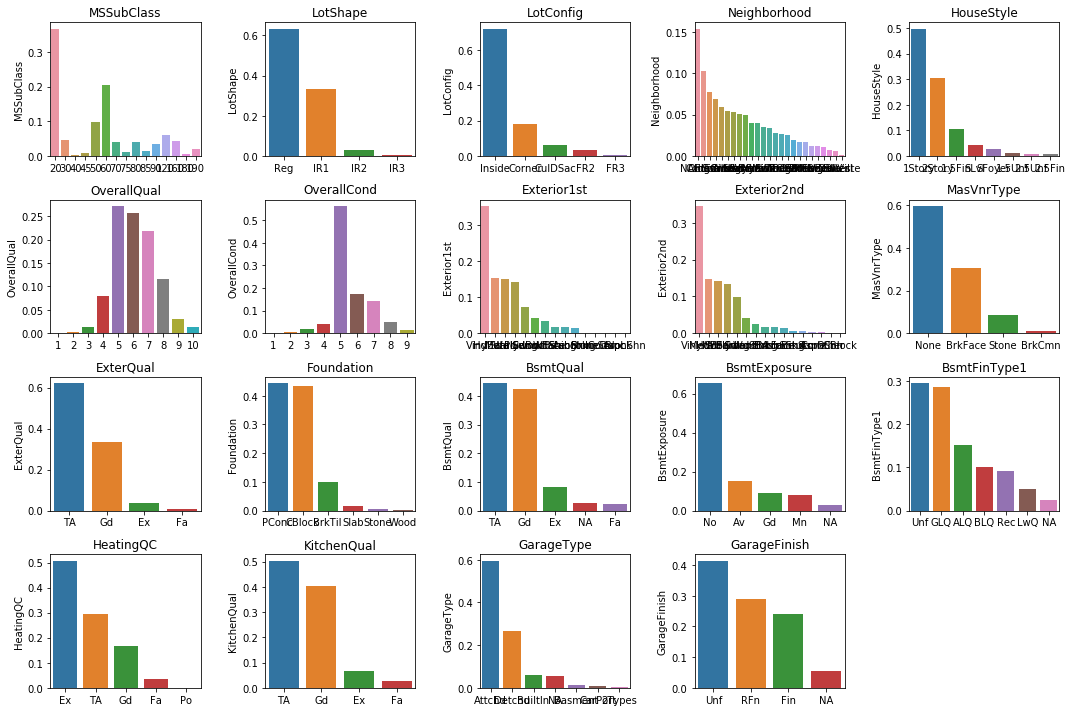

In [29]:
# plotting bar plot of remaining categories and group categories together 

plt.figure(figsize= [15, 10])

for i in enumerate(df_cat): 
    plt.subplot(4,5, i[0]+1)
    sns.barplot(x= df_cat[i[1]].value_counts().index, y= df_cat[i[1]].value_counts(normalize= True))
    plt.tight_layout()
    plt.title(i[1])

In [30]:
# clubbing LotShape 

df['LotShape']= df['LotShape'].replace('IR1', 'IR')
df['LotShape']= df['LotShape'].replace('IR2', 'IR')
df['LotShape']= df['LotShape'].replace('IR3', 'IR')

In [31]:
# checking LotShape ValueCounts

df['LotShape'].value_counts(normalize= True)

Reg   0.6336
IR    0.3664
Name: LotShape, dtype: float64

In [32]:
# clubbing LotConfig 

df['LotConfig']= df['LotConfig'].replace('Corner', 'Others')
df['LotConfig']= df['LotConfig'].replace('CulDSac', 'Others')
df['LotConfig']= df['LotConfig'].replace('FR2', 'Others')
df['LotConfig']= df['LotConfig'].replace('FR3', 'Others')

In [33]:
# checking LotConfig ValueCounts

df['LotConfig'].value_counts(normalize= True)

Inside   0.7205
Others   0.2795
Name: LotConfig, dtype: float64

In [34]:
# clubbing HouseStyle 

df['HouseStyle']= df['HouseStyle'].replace('1.5Fin', '1.5Story')
df['HouseStyle']= df['HouseStyle'].replace('1.5Unf', '1.5Story')
df['HouseStyle']= df['HouseStyle'].replace('2.5Fin', 'Others')
df['HouseStyle']= df['HouseStyle'].replace('2.5Unf', 'Others')
df['HouseStyle']= df['HouseStyle'].replace('SFoyer', 'Others')
df['HouseStyle']= df['HouseStyle'].replace('SLvl', 'Others')

In [35]:
# checking HouseStyle ValueCounts

df['HouseStyle'].value_counts(normalize= True)

1Story     0.4973
2Story     0.3048
1.5Story   0.1151
Others     0.0829
Name: HouseStyle, dtype: float64

In [36]:
# clubbing GarageType 

df['GarageType']= df['GarageType'].replace('BuiltIn', 'Others')
df['GarageType']= df['GarageType'].replace('Basment', 'Others')
df['GarageType']= df['GarageType'].replace('CarPort', 'Others')
df['GarageType']= df['GarageType'].replace('2Types', 'Others')

In [37]:
# checking GarageType ValueCounts

df['GarageType'].value_counts(normalize= True)

Attchd   0.5959
Detchd   0.2651
Others   0.0836
NA       0.0555
Name: GarageType, dtype: float64

In [38]:
df_cat.columns

Index(['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish'],
      dtype='object')

## 3. Perform Exploratory Data Analysis

#### Univariate Analysis

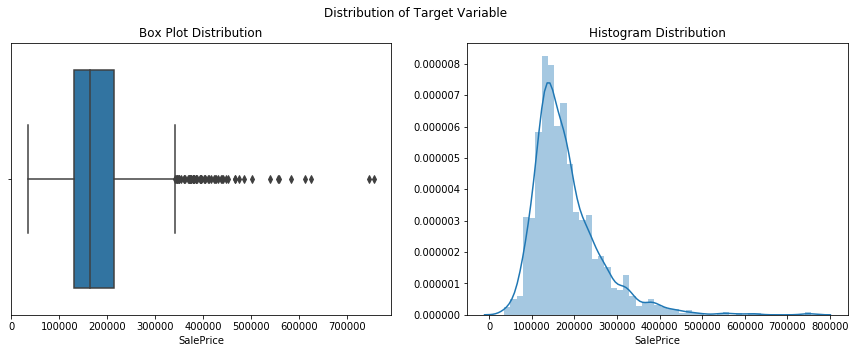

In [39]:
# checking the distribution of Target Variable 

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of Target Variable')
sns.distplot(df['SalePrice'], kde= True,  ax= axes[1])
axes[1].set_title('Histogram Distribution')
sns.boxplot(df['SalePrice'], ax= axes[0])
axes[0].set_title('Box Plot Distribution')
fig.show()

In [40]:
# since the target variable is highly right skewed we need to transform the target variable to get the normal distribution 
# applying log transformation on the target variable

df['SalePrice']= np.log(df['SalePrice'])

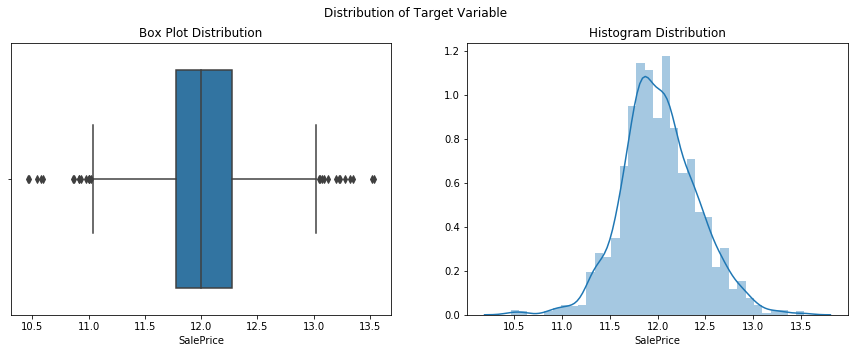

In [41]:
# checking the distribution after the transforamtion of Target Variable 

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of Target Variable')
sns.distplot(df['SalePrice'], kde= True,  ax= axes[1])
axes[1].set_title('Histogram Distribution')
sns.boxplot(df['SalePrice'], ax= axes[0])
axes[0].set_title('Box Plot Distribution')
fig.show()

#### Bivariate Analysis

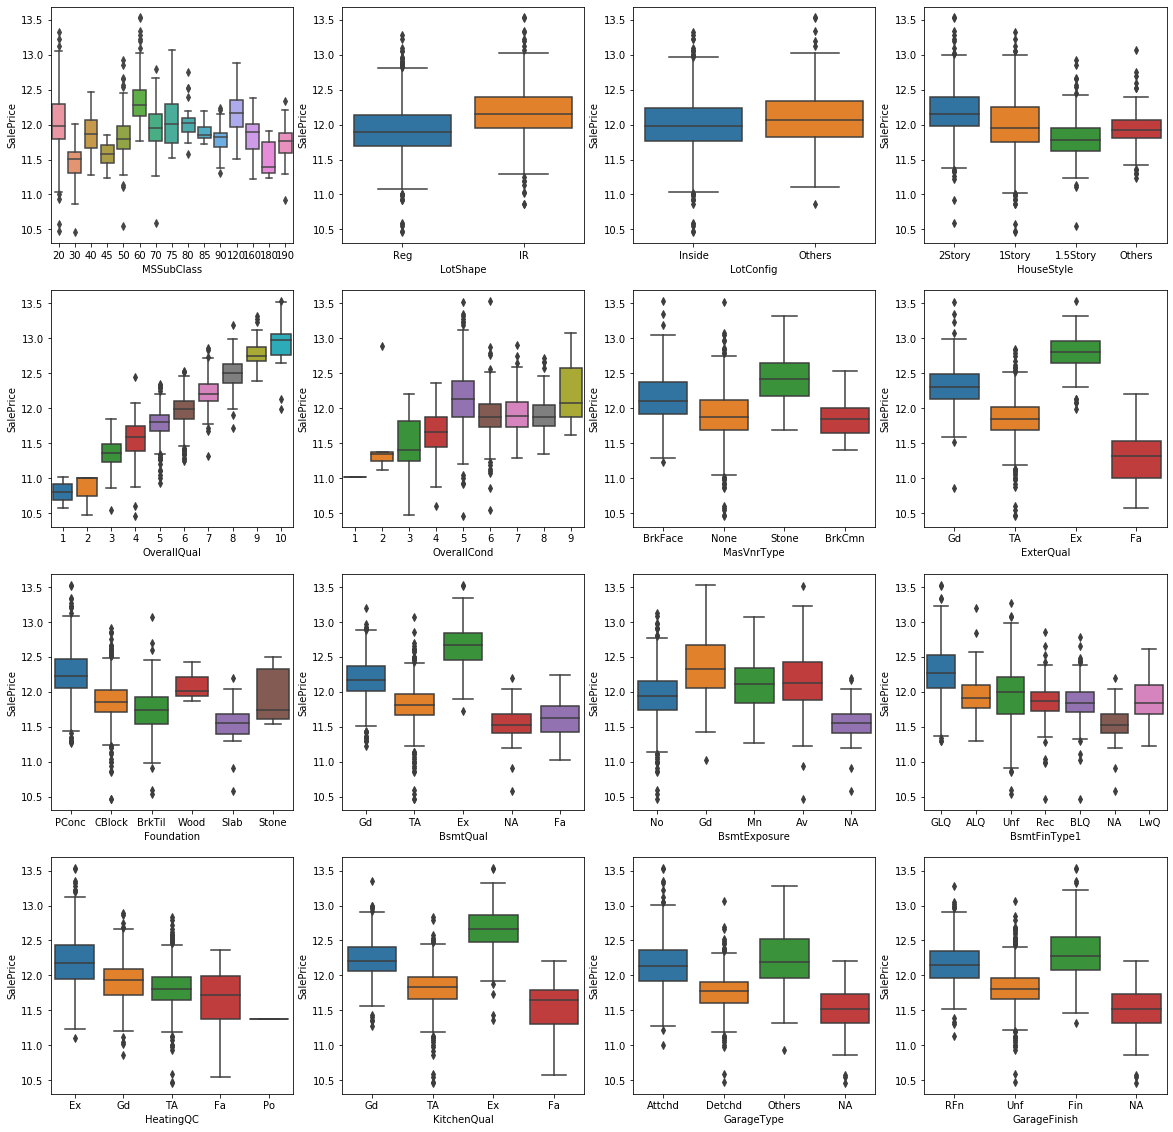

In [42]:
# plotting the distribution of sales price w.r.t different categorical columns 

cat_col = [col for col in df_cat if col not in ['Neighborhood', 'Exterior1st', 'Exterior2nd']]

plt.figure(figsize= (20,20))
for i in enumerate(cat_col): 
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x= df[i[1]], y= df['SalePrice'])

#### Multivariate Analysis

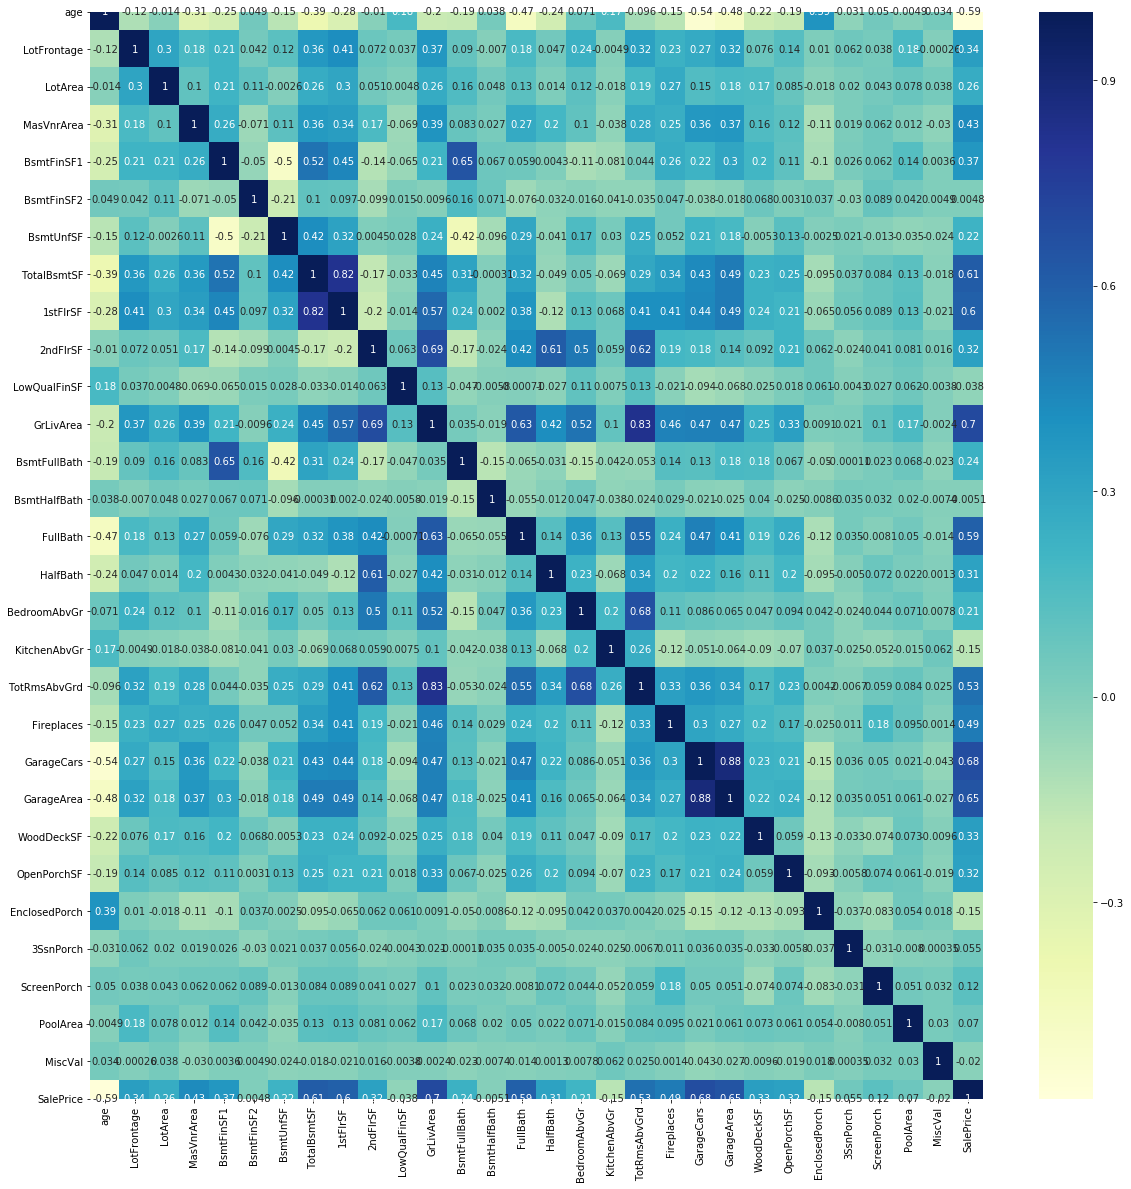

In [43]:
# plotting correalation matrix for all the numerical columns 

plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), cmap= 'YlGnBu',annot= True)
plt.show()

## Step 4: Data preparation

### 4.1 Creating dummy variables for categorical variables



In [44]:
df_cat.head()

,MSSubClass,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,60,Reg,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn
1,20,Reg,FR2,Veenker,1Story,6,8,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn
2,60,IR1,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn
3,70,IR1,Corner,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf
4,60,IR1,FR2,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn


In [45]:
# since 'OverallQual', 'OverallCond' are in LabelEncoded form we can ignore them 

df_cat.pop('OverallQual')
df_cat.pop('OverallCond')

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: object

In [46]:
df_cat.head()

,MSSubClass,LotShape,LotConfig,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,60,Reg,Inside,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn
1,20,Reg,FR2,Veenker,1Story,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn
2,60,IR1,Inside,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn
3,70,IR1,Corner,Crawfor,2Story,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf
4,60,IR1,FR2,NoRidge,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn


In [47]:
# creating dummies for the categorical columns 

cat_dummy= pd.get_dummies(df[df_cat.columns], drop_first= True)

cat_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_Reg,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,Exterior1st_AsphShn,Exterior1st_BrkComm,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [48]:
# dropping df_cat from the df 

df.drop(columns= df_cat.columns, inplace= True)

df.head()

,age,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,18,65.0000,8450,7,5,196.0000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,12.2477
1,45,80.0000,9600,6,8,0.0000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,12.1090
2,20,68.0000,11250,7,5,162.0000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,12.3172
3,106,60.0000,9550,7,5,0.0000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,11.8494
4,21,84.0000,14260,8,5,350.0000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12.4292


In [49]:
# concatinating the cat_dummy with df 

df= pd.concat([df, cat_dummy], axis= 1)

In [50]:
# checking the df head 

df.head()

,age,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,18,65.0000,8450,7,5,196.0000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,12.2477,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,45,80.0000,9600,6,8,0.0000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,12.1090,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,68.0000,11250,7,5,162.0000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,12.3172,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,106,60.0000,9550,7,5,0.0000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,11.8494,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4,21,84.0000,14260,8,5,350.0000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12.4292,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [51]:
# checking info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 142 entries, age to GarageFinish_Unf
dtypes: float64(3), int64(27), object(2), uint8(110)
memory usage: 522.0+ KB


### 4.2 Train Test split

In [52]:
# setting dependent and independent variables 

y= df['SalePrice']
X= df.iloc[:, :-1]

In [53]:
print('shape of y: {}'.format(y.shape))
print('shape of x: {}'.format(X.shape))

shape of y: (1460,)
shape of x: (1460, 141)


In [54]:
# splitting the data into train and test 

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state= 0)

In [55]:
# checking shapes 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021, 141), (438, 141), (1021,), (438,))

In [56]:
# scaling the X_train data

scaler = StandardScaler() 
X_train= scaler.fit_transform(X_train)
X_train= pd.DataFrame(X_train, columns= X.columns)
X_train

,age,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,...,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn
0,-0.8629,-0.0267,-0.1154,0.6789,-0.5035,2.5918,0.6896,-0.2987,-0.5718,0.0044,-0.2799,1.4125,-0.1192,0.9893,1.1282,-0.2410,0.7832,1.2415,0.1330,-0.2037,0.8985,-0.9650,0.3216,0.8410,3.7476,-0.1678,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,0.6890,-0.2197,-0.0543,-0.1044,-0.3277,1.9419,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,...,-0.3920,-0.0313,-0.3510,-0.0627,-0.1262,1.3786,-0.4019,-0.1710,1.5503,-1.2283,-0.3240,-0.1091,-0.7050,0.7716,-0.8720,1.1242,-0.1377,-0.0702,-0.0313,-0.1518,1.1747,-0.1552,-0.9109,-0.3109,-0.3014,-0.1552,0.7191,-0.3439,1.5877,-0.2269,-0.1552,-0.3203,-0.6481,-0.1828,-0.4548,-0.0313,-0.6572,-0.1710,1.2434,-1.0248,-0.5981,-0.2363,-0.3090,-0.2363,1.5358
1,-0.8298,-0.0267,-0.7459,-0.0577,-0.5035,-0.5688,1.3040,-0.2987,-0.6412,0.5748,0.3458,-0.8042,-0.1192,-0.4459,1.1282,-0.2410,-1.0636,-0.7673,-1.1132,-0.2037,-0.3395,0.6089,0.3216,-0.1838,1.6520,-0.7002,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,0.0969,-0.2197,-0.0543,-0.1044,-0.3277,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,4.0021,-0.2221,-0.0627,...,-0.3920,-0.0313,-0.3510,-0.0627,-0.1262,-0.7254,2.4880,-0.1710,-0.6450,0.8142,-0.3240,-0.1091,-0.7050,0.7716,-0.8720,1.1242,-0.1377,-0.0702,-0.0313,-0.1518,1.1747,-0.1552,-0.9109,-0.3109,3.3184,-0.1552,-1.3907,-0.3439,1.5877,-0.2269,-0.1552,-0.3203,-0.6481,-0.1828,-0.4548,-0.0313,-0.6572,-0.1710,1.2434,-1.0248,-0.5981,-0.2363,-0.3090,-0.2363,-0.6511
2,0.4272,-0.9388,-0.3261,-0.7943,1.2847,-0.5688,0.5896,-0.2987,-0.9325,-0.4807,-0.8120,-0.8042,-0.1192,-1.2822,1.1282,-0.2410,-1.0636,-0.7673,-1.1132,-0.2037,-1.5775,-0.9650,-2.4031,-2.2479,0.1718,-0.7002,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,-0.8866,-0.2197,-0.0543,-0.1044,-0.3277,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,...,-0.3920,-0.0313,2.8489,-0.0627,-0.1262,-0.7254,-0.4019,-0.1710,-0.6450,0.8142,-0.3240,-0.1091,-0.7050,0.7716,1.1468,-0.8895,-0.1377,-0.0702,-0.0313,-0.1518,-0.8513,-0.1552,1.0978,3.2163,-0.3014,-0.1552,-1.3907,2.9075,-0.6299,-0.2269,-0.1552,-0.3203,-0.6481,-0.1828,2.1987,-0.0313,-0.6572,-0.1710,-0.8042,0.9758,-0.5981,4.2317,-0.3090,4.2317,-0.6511
3,1.0557,-0.4588,-0.1460,-0.0577,-0.5035,-0.5688,-0.5554,-0.2987,-0.4840,-1.2072,-1.2399,0.4664,-0.1192,-0.5096,-0.8143,-0.2410,-1.0636,-0.7673,-1.1132,-0.2037,-0.3395,-0.9650,-1.0408,-0.9070,-0.7397,-0.7002,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,-1.1451,-0.2197,-0.0543,-0.1044,3.0517,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,...,-0.3920,-0.0313,-0.3510,-0.0627,-0.1262,-0.7254,-0.4019,5.8487,-0.6450,0.8142,-0.3240,-0.1091,-0.7050,0.7716,-0.8720,-0.8895,-0.1377,-0.0702,-0.0313,-0.1518,-0.8513,-0.1552,1.0978,-0.3109,3.3184,-0.1552,-1.3907,-0.3439,-0.6299,-0.2269,-0.1552,3.1221,-0.6481,

In [57]:
# scaling the X_test values

X_test= scaler.transform(X_test)
X_test= pd.DataFrame(X_test, columns= X.columns)
X_test

,age,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,...,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn
0,0.4603,-0.0267,2.1484,-0.0577,-2.2917,-0.5688,1.8067,-0.2987,0.5794,2.3885,3.6186,-0.8042,-0.1192,1.9184,1.1282,-0.2410,2.6300,-0.7673,1.3793,4.3184,1.5174,2.1828,0.3216,0.0700,-0.7397,-0.7002,2.7441,-0.1159,-0.2785,-0.0536,-0.0952,0.4654,-0.2197,-0.0543,-0.1044,-0.3277,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,...,-0.3920,-0.0313,-0.3510,15.9452,-0.1262,-0.7254,-0.4019,-0.1710,-0.6450,0.8142,-0.3240,-0.1091,1.4184,-1.2961,-0.8720,1.1242,-0.1377,-0.0702,-0.0313,-0.1518,-0.8513,-0.1552,1.0978,-0.3109,-0.3014,-0.1552,0.7191,-0.3439,-0.6299,-0.2269,-0.1552,3.1221,-0.6481,-0.1828,-0.4548,-0.0313,1.5215,-0.1710,-0.8042,0.9758,-0.5981,-0.2363,-0.3090,-0.2363,1.5358
1,0.9895,0.4533,-0.1042,-0.0577,1.2847,-0.5688,-0.0923,0.7460,-0.7568,-0.6075,-0.5446,0.6025,-0.1192,0.1085,1.1282,-0.2410,-1.0636,-0.7673,0.1330,-0.2037,-0.9585,2.1828,-1.0408,-1.0985,-0.7397,-0.7002,0.1302,-0.1159,-0.2785,-0.0536,-0.0952,-0.5571,-0.2197,-0.0543,-0.1044,3.0517,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,...,-0.3920,-0.0313,-0.3510,-0.0627,-0.1262,-0.7254,2.4880,-0.1710,-0.6450,0.8142,-0.3240,-0.1091,-0.7050,0.7716,1.1468,-0.8895,-0.1377,-0.0702,-0.0313,-0.1518,-0.8513,-0.1552,1.0978,-0.3109,-0.3014,-0.1552,0.7191,2.9075,-0.6299,-0.2269,-0.1552,-0.3203,-0.6481,-0.1828,-0.4548,-0.0313,1.5215,5.8487,-0.8042,-1.0248,-0.5981,-0.2363,-0.3090,-0.2363,-0.6511
2,0.6918,-0.0267,-0.3447,-0.7943,-1.3976,0.3193,-0.5996,-0.2987,-0.0956,-0.8440,-0.4885,-0.2960,-0.1192,-0.6158,1.1282,-0.2410,-1.0636,-0.7673,0.1330,-0.2037,-0.9585,0.6089,-1.0408,-0.5621,-0.7397,-0.7002,3.4910,-0.1159,-0.2785,-0.0536,-0.0952,-1.0294,-0.2197,-0.0543,-0.1044,3.0517,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,...,2.5510,-0.0313,-0.3510,-0.0627,-0.1262,-0.7254,-0.4019,-0.1710,-0.6450,-1.2283,-0.3240,-0.1091,-0.7050,0.7716,1.1468,-0.8895,-0.1377,-0.0702,-0.0313,-0.1518,-0.8513,-0.1552,1.0978,-0.3109,-0.3014,-0.1552,0.7191,-0.3439,-0.6299,4.4068,-0.1552,-0.3203,-0.6481,-0.1828,-0.4548,-0.0313,1.5215,-0.1710,1.2434,-1.0248,1.6720,-0.2363,-0.3090,-0.2363,-0.6511
3,-0.2013,0.6454,-0.0541,0.6789,-0.5035,1.0804,-0.1179,-0.2987,0.4684,0.2555,-0.0152,1.1607,-0.1192,0.9661,-0.8143,-0.2410,0.7832,1.2415,1.3793,-0.2037,0.8985,0.6089,0.3216,0.1706,1.5040,1.0301,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,0.3561,-0.2197,-0.0543,-0.1044,-0.3277,1.9419,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,...,-0.3920,-0.0313,2.8489,-0.0627,-0.1262,-0.7254,-0.4019,-0.1710,1.5503,-1.2283,-0.3240,-0.1091,-0.7050,0.7716,1.1468,-0.8895,-0.1377,-0.0702,-0.0313,-0.1518,1.1747,-0.1552,-0.9109,-0.3109,-0.3014,-0.1552,0.7191,2.9075,-0.6299,-0.2269,-0.1552,-0.3203,-0.6481,-0.1828,-0.4548,-0.0

## Step 5: Model Building and Evaluation

In [58]:
def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=0)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X[[i for i in variables]]

X = X_train.copy()

X2 = calculate_vif_(X,5) # calling VIF function

141
Mon Jan 25 18:16:09 2021 dropping 'BsmtFinSF1' at index: 6
140
Mon Jan 25 18:16:10 2021 dropping '1stFlrSF' at index: 9
139
Mon Jan 25 18:16:11 2021 dropping 'Exterior1st_AsphShn' at index: 73
138
Mon Jan 25 18:16:12 2021 dropping 'Exterior1st_CBlock' at index: 75
137
Mon Jan 25 18:16:13 2021 dropping 'BsmtQual_NA' at index: 113
136
Mon Jan 25 18:16:14 2021 dropping 'BsmtExposure_NA' at index: 116
135
Mon Jan 25 18:16:15 2021 dropping 'GarageType_NA' at index: 131
134
Mon Jan 25 18:16:16 2021 dropping 'Exterior1st_VinylSd' at index: 82
133
Mon Jan 25 18:16:17 2021 dropping 'Exterior2nd_MetalSd' at index: 91
132
Mon Jan 25 18:16:18 2021 dropping 'HouseStyle_1Story' at index: 70
131
Mon Jan 25 18:16:19 2021 dropping 'MasVnrType_None' at index: 98
130
Mon Jan 25 18:16:20 2021 dropping 'Exterior2nd_CmentBd' at index: 87
129
Mon Jan 25 18:16:21 2021 dropping 'HouseStyle_2Story' at index: 70
128
Mon Jan 25 18:16:22 2021 dropping 'Neighborhood_NAmes' at index: 57
127
Mon Jan 25 18:16:23 2

In [59]:
# checking the df 

X2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_Reg,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,GarageType_Detchd,GarageType_Others,GarageFinish_NA,GarageFinish_RFn
0,-0.0267,-0.1154,0.6789,-0.5035,2.5918,-0.2987,-0.5718,-0.1192,1.1282,-0.2410,0.7832,1.2415,0.1330,-0.2037,0.8985,-0.9650,0.8410,3.7476,-0.1678,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,-0.2197,-0.0543,-0.1044,-0.3277,1.9419,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,-0.1449,0.7683,-0.6147,-0.0443,-0.0995,-0.2045,-0.1552,2.9536,...,-0.3953,-0.3033,-0.0443,-0.1301,-0.4117,-0.1449,-0.0313,-0.0627,-0.1340,-0.0313,-0.4003,-0.0889,-0.0313,-0.3510,-0.0627,-0.1262,-0.1710,1.5503,-0.3240,-0.1091,-0.7050,-0.8720,-0.1377,-0.0702,-0.0313,-0.1518,1.1747,-0.3109,-0.3014,0.7191,-0.3439,1.5877,-0.2269,-0.3203,-0.6481,-0.1828,-0.4548,-0.0313,-0.6572,-0.1710,1.2434,-0.5981,-0.3090,-0.2363,1.5358
1,-0.0267,-0.7459,-0.0577,-0.5035,-0.5688,-0.2987,-0.6412,-0.1192,1.1282,-0.2410,-1.0636,-0.7673,-1.1132,-0.2037,-0.3395,0.6089,-0.1838,1.6520,-0.7002,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,-0.2197,-0.0543,-0.1044,-0.3277,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,4.0021,-0.2221,-0.0627,-0.1449,0.7683,-0.6147,-0.0443,-0.0995,-0.2045,6.4453,-0.3386,...,-0.3953,-0.3033,-0.0443,-0.1301,2.4287,-0.1449,-0.0313,-0.0627,-0.1340,-0.0313,-0.4003,-0.0889,-0.0313,-0.3510,-0.0627,-0.1262,-0.1710,-0.6450,-0.3240,-0.1091,-0.7050,-0.8720,-0.1377,-0.0702,-0.0313,-0.1518,1.1747,-0.3109,3.3184,-1.3907,-0.3439,1.5877,-0.2269,-0.3203,-0.6481,-0.1828,-0.4548,-0.0313,-0.6572,-0.1710,1.2434,-0.5981,-0.3090,-0.2363,-0.6511
2,-0.9388,-0.3261,-0.7943,1.2847,-0.5688,-0.2987,-0.9325,-0.1192,1.1282,-0.2410,-1.0636,-0.7673,-1.1132,-0.2037,-1.5775,-0.9650,-2.2479,0.1718,-0.7002,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,-0.2197,-0.0543,-0.1044,-0.3277,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,-0.1449,-1.3015,-0.6147,-0.0443,-0.0995,4.8890,-0.1552,-0.3386,...,-0.3953,-0.3033,-0.0443,-0.1301,2.4287,-0.1449,-0.0313,-0.0627,-0.1340,-0.0313,-0.4003,-0.0889,-0.0313,2.8489,-0.0627,-0.1262,-0.1710,-0.6450,-0.3240,-0.1091,-0.7050,1.1468,-0.1377,-0.0702,-0.0313,-0.1518,-0.8513,3.2163,-0.3014,-1.3907,2.9075,-0.6299,-0.2269,-0.3203,-0.6481,-0.1828,2.1987,-0.0313,-0.6572,-0.1710,-0.8042,-0.5981,-0.3090,4.2317,-0.6511
3,-0.4588,-0.1460,-0.0577,-0.5035,-0.5688,-0.2987,-0.4840,-0.1192,-0.8143,-0.2410,-1.0636,-0.7673,-1.1132,-0.2037,-0.3395,-0.9650,-0.9070,-0.7397,-0.7002,-0.3677,-0.1159,-0.2785,-0.0536,-0.0952,-0.2197,-0.0543,-0.1044,3.0517,-0.5150,-0.2147,-0.0995,-0.1912,-0.1136,-0.1828,-0.2499,-0.2221,-0.0627,-0.1449,0.7683,-0.6147,-0.0443,-0.0995,-0.2045,-0.1552,-0.3386,...,-0.3953,-0.3033,-0.0443,-0.1301,-0.4117,6.9007,-0.0313,-0.0627,-0.1340,-0.0313,-0.4003,-0.0889,-0.0313,-0.3510,-0.0627,-0

In [60]:
# selecting only these returned columns 

X_train= X_train[X2.columns]
X_test= X_test[X2.columns]

In [61]:
# checking the shapes 

X_train.shape, X_test.shape

((1021, 112), (438, 112))

#### Feature selection using RFE as 50

In [62]:
# selecting important features using RFE 
# building a linear regression model for the RFE to select features

lm= LinearRegression()
lm.fit(X_train, y_train)

# passing the build model to RFE to select 15 significant features
rfe= RFE(lm, 50)
rfe= rfe.fit(X_train, y_train)

In [63]:
# checking the columns and their rankings that have been selected

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF2', False, 33),
 ('BsmtUnfSF', True, 1),
 ('LowQualFinSF', False, 56),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 6),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 50),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 18),
 ('EnclosedPorch', False, 55),
 ('3SsnPorch', False, 28),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 57),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 16),
 ('MSSubClass_45', False, 3),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', False, 44),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_85', False, 51),
 ('MSSubClass_90', False, 36),
 ('MSSubClass_120', False, 5),
 ('MSSubClass_160', True,

In [64]:
# checking the columns required for model  building 

col= X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtUnfSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch',
       'PoolArea', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_80', 'MSSubClass_160', 'MSSubClass_190',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_Wd Sdng', 'Exterior2nd_BrkFace',
       'Foundation_Slab', 'BsmtExposure_Gd', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA',
       'Garag

In [65]:
# selecting only the RFE cols 

X_train= X_train[col]
X_test= X_test[col]

###  Linear Regression Model


In [66]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8968708864980078
0.8300796474164502
17.0198779869563
11.499508894826292
0.016669811936294122
0.026254586517868245


### Ridge Regression

In [68]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [69]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [70]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.01728191  0.01615177  0.10347536  0.03546795  0.01524773  0.02423024
  0.03125575  0.04910322  0.03328737 -0.01951386  0.05787543  0.0306705
  0.0555223   0.02281167  0.01246551  0.01134464 -0.02853309 -0.01002537
 -0.00965191 -0.00667844 -0.01108452 -0.01882173 -0.01006448 -0.0121645
  0.01016524  0.01562798  0.01526643  0.02972078  0.00955385 -0.02884538
 -0.01256816  0.02826552  0.03362599  0.02911174  0.02911494  0.01130184
  0.00909619 -0.01621108  0.01845105 -0.01040948 -0.00705537 -0.01664286
  0.01957412 -0.01037333 -0.03138161 -0.022192   -0.01464656 -0.02940305
 -0.01900008 -0.01323195]


In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8950248607271045
0.8350280886129559
17.324536218901088
11.164618796674208
0.016968203936240045
0.025489997252680842


### Lasso Regression

In [72]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [73]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [74]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8963962096985415
0.8330686596830554
17.09821611026422
11.297224868081052
0.016746538795557514
0.0257927508403677


### Metric Evaluation¶

In [76]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.8969,0.8950,0.8964
1,R2 Score (Test),0.8301,0.8350,0.8331
2,RSS (Train),17.0199,17.3245,17.0982
3,RSS (Test),11.4995,11.1646,11.2972
4,MSE (Train),0.1291,0.1303,0.1294
5,MSE (Test),0.1620,0.1597,0.1606


### Lets observe the changes in the coefficients after regularization


In [77]:
# making a dataframe for observing the coefficient values 

betas = pd.DataFrame(index=X_train.columns)

In [78]:
# Making rows with columns 

betas.rows = X.columns

In [79]:
# capturing the the coefficient values of different Models 

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [80]:
# displaying coefficient values 

betas

,Linear,Ridge,Lasso
LotFrontage,0.0156,0.0173,0.0161
LotArea,0.0164,0.0162,0.0164
OverallQual,0.1126,0.1035,0.1174
OverallCond,0.0396,0.0355,0.0378
MasVnrArea,0.0114,0.0152,0.0109
BsmtUnfSF,0.0244,0.0242,0.0239
BsmtFullBath,0.0315,0.0313,0.0316
FullBath,0.0508,0.0491,0.0495
HalfBath,0.0429,0.0333,0.0377
KitchenAbvGr,-0.0227,-0.0195,-0.0208


In [81]:
# top 10 features from Lasso

betas.sort_values(by= 'Lasso', ascending= False).index[:10].tolist()

['OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'FullBath',
 'OverallCond',
 'HalfBath',
 'Neighborhood_NridgHt',
 'BsmtFullBath',
 'Neighborhood_Crawfor',
 'Neighborhood_Somerst']

In [82]:
# top 10 features from Ridge

betas.sort_values(by= 'Ridge', ascending= False).index[:10].tolist()

['OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'FullBath',
 'OverallCond',
 'Neighborhood_NridgHt',
 'HalfBath',
 'BsmtFullBath',
 'Fireplaces',
 'Neighborhood_Crawfor']

## Conclusion

1. The optimal values of alpha for Ridge & Lasso Regression are 50 & 0.0001 respectively.
2. The mean score for both Ridge & Lasso regressions are 89.7% 89.8% respectively.
3. The top 10 features that are responsible for predicting the house prices using `Ridge Regression` are ['OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'FullBath',
 'OverallCond',
 'Neighborhood_NridgHt',
 'HalfBath',
 'BsmtFullBath',
 'Fireplaces',
 'Neighborhood_Crawfor']
4. The top 10 features that are responsible for predicting the house prices using `Lasso Regression` are ['OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'FullBath',
 'OverallCond',
 'HalfBath',
 'Neighborhood_NridgHt',
 'BsmtFullBath',
 'Neighborhood_Crawfor',
 'Neighborhood_Somerst'].



## Subjective Question Solutions

#### Q1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented? 

In [83]:
# the optimal values of alpha for Ridge & Lasso are 50 & 0.0001 
# doubling the alpha values and building the Model Again 

alpha1= 100 
alpha2= 0.0002

# fitting Ridge Regression Model 
ridge= Ridge(alpha= alpha1)
ridge.fit(X_train[col], y_train) 

# fitting Lasso Regression Model
lasso= Lasso(alpha=alpha2)
lasso.fit(X_train[col], y_train) 


# predicting the r2 scores of Ridge & Lasso train data

print('R2 Scores for Training Data - ')
print('Ridge Regression: '+ str(r2_score(ridge.predict(X_train[col]), y_train)))
print('Lasso Regression: '+ str(r2_score(lasso.predict(X_train[col]), y_train)))

print()
# predicting the r2 scores of Ridge & Lasso test data

print('R2 Scores for Test Data - ')
print('Ridge Regression: '+ str(r2_score(ridge.predict(X_test[col]), y_test)))
print('Lasso Regression: '+ str(r2_score(lasso.predict(X_test[col]), y_test)))


R2 Scores for Training Data - 
Ridge Regression: 0.8761420410941093
Lasso Regression: 0.8846049799444803

R2 Scores for Test Data - 
Ridge Regression: 0.8344360818403036
Lasso Regression: 0.8390434078340143


In [84]:
# imporatant predictors 

betas_q1 = pd.DataFrame(index=col)


# Making rows with columns 

betas_q1.rows = col

# capturing the the coefficient values of different Models 

betas_q1['Ridge'] = ridge.coef_
betas_q1['Lasso'] = lasso.coef_

In [85]:
# top 10 features by Lasso Regression

features_lasso= betas_q1.sort_values(by= 'Lasso', ascending= False)['Lasso'][:10].index.to_list()

features_lasso

['OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'FullBath',
 'HalfBath',
 'OverallCond',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'BsmtFullBath',
 'Neighborhood_Crawfor']

In [86]:
# top 10 features by Ridge Regression

features_ridge= betas_q1.sort_values(by= 'Ridge', ascending= False)['Lasso'][:10].index.to_list()

features_ridge

['OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'FullBath',
 'OverallCond',
 'Neighborhood_NridgHt',
 'HalfBath',
 'BsmtFullBath',
 'Fireplaces',
 'Neighborhood_Crawfor']

#### Solution 1: 

1. If the value of alphas were doubled for Ridge & Lasso Regression the performance of the models were decreased.
2. The top 10 features that are responsible for predicting the house prices using `Ridge Regression` are ['OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'FullBath',
 'OverallCond',
 'Neighborhood_NridgHt',
 'HalfBath',
 'BsmtFullBath',
 'Fireplaces',
 'Neighborhood_Crawfor']
3. The top 10 features that are responsible for predicting the house prices using `Lasso Regression` are ['OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'FullBath',
 'OverallCond',
 'HalfBath',
 'Neighborhood_NridgHt',
 'BsmtFullBath',
 'Neighborhood_Crawfor',
 'Neighborhood_Somerst'].



#### Q3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [87]:
# the top 5 feature 

top_5= features_lasso[:5]

In [88]:
# making new_col list apart from the top_5

new_col= [c for c in col if c not in top_5]

In [89]:
# Initiating the Lasso Regression 

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[new_col], y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
# imporatant predictors 

betas_q3 = pd.DataFrame(index=new_col)


# Making rows with columns 

betas_q3.rows = new_col

# capturing the the coefficient values of different Models 

betas_q3['Lasso'] = lasso.coef_

In [91]:
# top 5 features by Lasso Regression

betas_q3.sort_values(by= 'Lasso', ascending= False)['Lasso'][:5].index.to_list()

['BsmtUnfSF',
 'Neighborhood_NridgHt',
 'MSSubClass_60',
 'Neighborhood_Somerst',
 'Fireplaces']

#### Solution 3:


1. The top 5 features/predictor variables found using the Lasso Regression are: ['OverallQual', 'TotRmsAbvGrd', 'GarageArea', 'FullBath', 'OverallCond', ]
2.    When the top 5 features were not found in the data and if the new model is built by excluding them, the newpredictor variables are: ['SaleCondition_Partial', 'Neighborhood_NridgHt', 'BedroomAbvGr', 'ExterQual_Gd', 'FireplaceQu_Gd'].

